# Quora Question Pair


The goal of this project is to predict if pairs of questions have the same meaning. Human experts have provided labels for the dataset, but these labels are subjective and not completely accurate. The dataset represents a reasonable consensus, but individual items may have incorrect labeling.

## Data Acquuisition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data=data.sample(40000,random_state=42)

In [4]:
data.shape

(40000, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 8067 to 265030
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            40000 non-null  int64 
 1   qid1          40000 non-null  int64 
 2   qid2          40000 non-null  int64 
 3   question1     40000 non-null  object
 4   question2     40000 non-null  object
 5   is_duplicate  40000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.1+ MB


## Text Preparation

In [6]:
from nltk.tokenize import word_tokenize


In [7]:
def prepare(q):
    # Lower case
    q=str(q).lower().strip()
    # Replacing Special character
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    q = q.replace('[math]', '')
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    q_pre=[]
    for word in q.split():
        if word in contractions:
            word=contractions[word]
        q_pre.append(word)
        q = ' '.join(q_pre)
        
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    
    return q

In [8]:
prepare("I'll always be WITH you <b>e</b>?")

'i will always be with you e'

In [9]:
# Applying in the feature columns
data['question1']=data['question1'].apply(prepare)
data['question2']=data['question2'].apply(prepare)

C:\Users\rckzs\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [10]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1


## Data Cleaning 

In [11]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data['is_duplicate'].value_counts()

0    25224
1    14776
Name: is_duplicate, dtype: int64

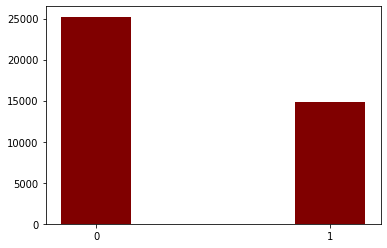

In [14]:
plt.bar(('0','1'),data['is_duplicate'].value_counts(),width=0.3,color='maroon')
plt.show()

# Feature Engineering (Construction)

In [15]:
new=data.copy()

In [16]:
new['q1_len']=new['question1'].str.len()
new['q2_len']=new['question2'].str.len()

In [17]:
new.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28


In [18]:
# no. of words in q1 and q2.
new['num_words_q1']=new['question1'].apply(lambda x: len(x.split(' ')))
new['num_words_q2']=new['question2'].apply(lambda x: len(x.split(' ')))

In [19]:
new.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,num_words_q1,num_words_q2
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7


In [20]:
# Common words 
def common(x):
    w1=set(map(lambda x:x.lower().strip(),x['question1'].split(" ")))
    w2=set(map(lambda x:x.lower().strip(),x['question2'].split(" ")))
    return len(w1 & w2) # word in both question

In [21]:
new['common_len']=new.apply(common,axis=1)

In [22]:
new.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,num_words_q1,num_words_q2,common_len
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,6
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,2
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,6
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4


In [23]:
# Total words.
def total(x):
    w1=set(map(lambda x:x.lower().strip(),x['question1'].split(" ")))
    w2=set(map(lambda x:x.lower().strip(),x['question2'].split(" ")))
    return (len(w1)+len(w2))

In [24]:
new['total_words']=new.apply(total,axis=1)

In [25]:
new.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,num_words_q1,num_words_q2,common_len,total_words
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7,16
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,6,20
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,2,25
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,6,16
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4,16


In [26]:
# Removing unimportant columns.
final=new.drop(columns=['id','qid1','qid2','question1','question2'])

In [27]:
final.head()

,is_duplicate,q1_len,q2_len,num_words_q1,num_words_q2,common_len,total_words
8067,0,33,33,8,8,7,16
368101,0,52,50,11,9,6,20
70497,0,95,44,17,8,2,25
226567,1,43,51,7,9,6,16
73186,1,37,28,9,7,4,16


In [28]:
final['common_ratio']=round(final['common_len']/final['total_words'],2)

In [29]:
final.head()

,is_duplicate,q1_len,q2_len,num_words_q1,num_words_q2,common_len,total_words,common_ratio
8067,0,33,33,8,8,7,16,0.44
368101,0,52,50,11,9,6,20,0.30
70497,0,95,44,17,8,2,25,0.08
226567,1,43,51,7,9,6,16,0.38
73186,1,37,28,9,7,4,16,0.25


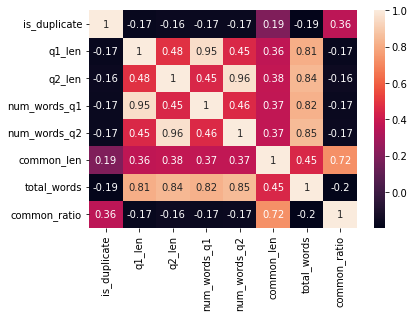

In [30]:
sns.heatmap(final.corr(),annot=True)
plt.show()

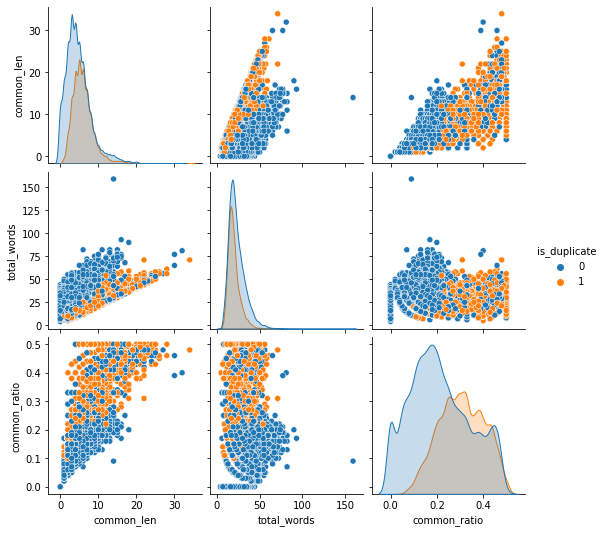

In [31]:
sns.pairplot(final[['is_duplicate','common_len','total_words','common_ratio']],hue='is_duplicate')

In [32]:
qndf=new[['question1','question2']]

In [33]:
qndf.head()

,question1,question2
8067,how do i play pokémon go in korea,how do i play pokémon go in china
368101,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...
70497,which is more advisable and better material fo...,what is the best server setup for buddypress
226567,how do i improve logical programming skills,how can i improve my logical skills for progra...
73186,how close we are to see 3rd world war,how close is a world war iii


In [34]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer
qns=list(qndf['question1'])+list(qndf['question2'])
cv=CountVectorizer(max_features=3000)
arr1,arr2=np.vsplit(cv.fit_transform(qns).toarray(),2)

In [35]:
qdf1=pd.DataFrame(arr1,index=qndf.index)
qdf2=pd.DataFrame(arr2,index=qndf.index)
qdf=pd.concat([qdf1,qdf2],axis=1)
qdf.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
qdf.shape

(40000, 6000)

In [37]:
prep_data=pd.concat([final,qdf],axis=1)

In [38]:
prep_data.head()

,is_duplicate,q1_len,q2_len,num_words_q1,num_words_q2,common_len,total_words,common_ratio,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,33,33,8,8,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,52,50,11,9,6,20,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,95,44,17,8,2,25,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,1,43,51,7,9,6,16,0.38,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,1,37,28,9,7,4,16,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y=prep_data['is_duplicate']
x=prep_data.drop(columns=['is_duplicate'])

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=0.25,random_state=42)

In [41]:
print(f'Size of training data: ({(x_train.shape)},{(y_train.shape)}')
print(f'Size of testing data: ({x_test.shape},{y_test.shape})')

Size of training data: ((30000, 6007),(30000,)
Size of testing data: ((10000, 6007),(10000,))


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,confusion_matrix
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.7675
0.7455489614243324


In [43]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [44]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [45]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = prepare(q1)
    q2 = prepare(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
        
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    return np.hstack((np.array(input_query).reshape(1,7),q1_bow,q2_bow))


In [46]:
rf.predict(query_point_creator(q2,q4))

array([0], dtype=int64)

In [47]:
print(confusion_matrix(y_test,y_pred))

[[5665  686]
 [1639 2010]]


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [49]:
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [50]:
clfs = {
    'NB': mnb, 
    'LR': lrc, 
    'RF': rfc, 
    'ETC': etc,
}

In [51]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [52]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  NB
Accuracy -  0.7392
Precision -  0.6416326530612245
For  LR
Accuracy -  0.7529
Precision -  0.6752976190476191
For  RF
Accuracy -  0.7616
Precision -  0.7396741189844638
For  ETC
Accuracy -  0.7753
Precision -  0.758480825958702


In [56]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('rfc',rfc),('et',etc)],voting='soft')

In [57]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [59]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Confusion Matrix",confusion_matrix(y_test,y_pred))

Accuracy 0.7727
Precision 0.7536873156342183
Confusion Matrix [[5683  668]
 [1605 2044]]


In [61]:
import pickle

pickle.dump(voting,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))